In [1]:
import pandas as pd
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [4]:
df = df.drop_duplicates('review')

In [5]:
df.shape

(49582, 2)

<Axes: xlabel='sentiment', ylabel='count'>

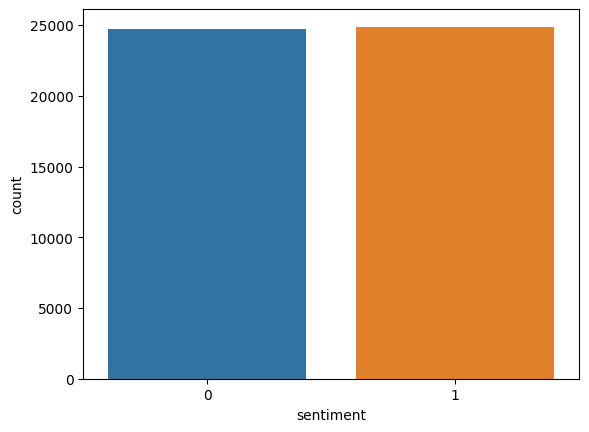

In [7]:
import seaborn as sns
sns.countplot(data=df, x='sentiment')


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['review']
Y = df['sentiment']
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [14]:
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]

/tmp/ipykernel_8522/1351179734.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y_train[:2000]
/tmp/ipykernel_8522/1351179734.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y_test[:500]


In [15]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [16]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=16, activation='relu', ))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15


2023-05-28 11:47:57.527412: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 815160000 exceeds 10% of free system memory.


200/200 [==============================] - 3s 11ms/step - loss: 0.6573 - accuracy: 0.6365
Epoch 2/15
200/200 [==============================] - 2s 11ms/step - loss: 0.4728 - accuracy: 0.8830
Epoch 3/15
200/200 [==============================] - 2s 11ms/step - loss: 0.2566 - accuracy: 0.9560
Epoch 4/15
200/200 [==============================] - 2s 11ms/step - loss: 0.1230 - accuracy: 0.9765
Epoch 5/15
200/200 [==============================] - 2s 11ms/step - loss: 0.0610 - accuracy: 0.9890
Epoch 6/15
200/200 [==============================] - 2s 11ms/step - loss: 0.0316 - accuracy: 0.9935
Epoch 7/15
200/200 [==============================] - 2s 11ms/step - loss: 0.0184 - accuracy: 0.9960
Epoch 8/15
200/200 [==============================] - 2s 11ms/step - loss: 0.0112 - accuracy: 0.9975
Epoch 9/15
200/200 [==============================] - 2s 11ms/step - loss: 0.0080 - accuracy: 0.9985
Epoch 10/15
200/200 [==============================] - 2s 11ms/step - loss: 0.0058 - accuracy: 0.9990


In [22]:
acc = model.evaluate(x_test, y_test)
print('accuracy:', acc)

16/16 [==============================] - 0s 5ms/step - loss: 0.5290 - accuracy: 0.8460
accuracy: [0.5289630889892578, 0.8460000157356262]
